In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
Rin = 1.086571
Rout = 1.361 # from my HFS cad model 
Tmax = 20
Tmin = 1
B = np.log(Tmax/Tmin) / (Rout - Rin)
A = Tmax*np.exp(B*Rin)

def T_r(r):
    return A*np.exp(-B*r)


Text(0, 0.5, 'T [eV]')

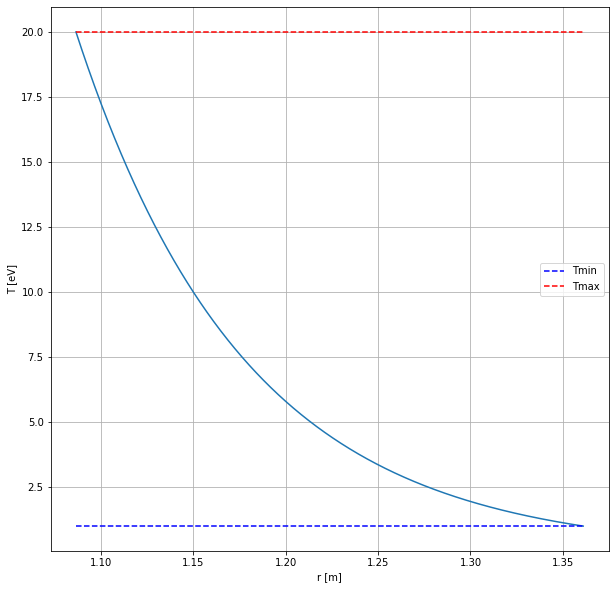

In [12]:
plt.figure(figsize=(10,10))
rarray = np.linspace(Rin, Rout, 1000)
Tarray = T_r(rarray)
plt.plot(rarray, Tarray)
plt.plot(rarray, [Tmin]*rarray.shape[0], color='blue', linestyle='--', label='Tmin')
plt.plot(rarray, [Tmax]*rarray.shape[0], color='red', linestyle='--', label='Tmax')
plt.legend()
plt.grid()
plt.xlabel('r [m]')
plt.ylabel('T [eV]')

In [36]:
def T_radial_and_theta(x, y, z):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    Tmax = 20
    Tmin = 1
    Rin = 1.086571 # 1.016, this is the outer radius of the vacuum gap region 
    Rout = 1.361 # from my HFS cad model 
    theta_kill = 0.1
    B = np.log(Tmax/Tmin) / (Rout - Rin)
    A = Tmax*np.exp(B*Rin)
    
    if r >= Rin:
        rfactor =  A*np.exp(-B*r)
    else:
        rfactor = Tmax

    point2 = (0.231207448184173, 0.876001778482306, 0.0774999999999999)
    point1 = (0.89478877619906, -0.142088162730706, 0.0775)
    theta1 = np.arctan2(point1[1], point1[0])
    theta2 = np.arctan2(point2[1], point2[0])

    if theta < theta1: 
        tfactor = theta_kill

    elif theta > theta2:
        tfactor = theta_kill
    
    else:
        tfactor = 1

    return tfactor*rfactor


In [37]:
xarray = np.linspace(-1.5, 1.5, 500)
yarray = np.linspace(-1.5,1.5,500)
X, Y = np.meshgrid(xarray,yarray)
TT = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        TT[i,j] = T_radial_and_theta(x, y,0)



Text(0, 0.5, 'y [m]')

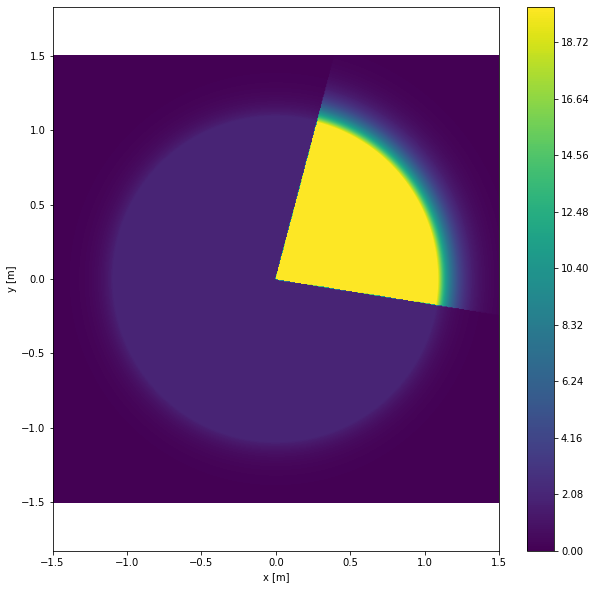

In [38]:
plt.figure(figsize=(10,10))
plt.contourf(X,Y,TT, levels=300)
plt.colorbar()
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

In [ ]:
def T_radial_and_theta_and_z(x, y, z):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    Tmax = 20
    Tmin = 1
    Rin = 1.086571 # 1.016, this is the outer radius of the vacuum gap region 
    Rout = 1.361 # from my HFS cad model 
    theta_kill = 0.1
    z_kill = 0.1
    B = np.log(Tmax/Tmin) / (Rout - Rin)
    A = Tmax*np.exp(B*Rin)
    
    if r >= Rin:
        rfactor =  A*np.exp(-B*r)
    else:
        rfactor = Tmax

    point2 = (0.231207448184173, 0.876001778482306, 0.0774999999999999)
    point1 = (0.89478877619906, -0.142088162730706, 0.0775)
    theta1 = np.arctan2(point1[1], point1[0])
    theta2 = np.arctan2(point2[1], point2[0])

    if theta < theta1: 
        tfactor = theta_kill

    elif theta > theta2:
        tfactor = theta_kill
    
    else:
        tfactor = 1

    # section for z factor 
    point_c = (0.89478877619906, -0.142088162730706, 0.0775)
    point_d = (0.869340816555924, -0.554263064500855, 0.1875)

    point_a = (0.869340816555924, -0.554263064500855, -0.185)
    point_b = (0.89478877619906, -0.142088162730706, -0.075)
    z_alpha = (point_a[2] + point_b[2])/2
    z_beta = (point_c[2] + point_d[2])/2

    if z > z_beta:
        zfactor = z_kill

    elif z < z_alpha:
        zfactor = z_kill

    else:
        zfactor = 1

    return tfactor*rfactor*zfactor